In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import datetime
pd.set_option('display.max_columns', 49)

In [2]:
data = pd.read_csv('US_Accidents_Dec20_Updated.csv')

In [3]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [6]:
f = open('data_description.txt')
print(f.read())

ID: This is a unique identifier of the accident record.

Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.

Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordina

## Phân tích số vụ tai nạn của từng bang, từng thành phố.

### Top 5 tiểu bang có số vụ tai nạn cao nhất.

Text(0.5, 1.0, 'Top 5 tiểu bang có số records lớn nhất')

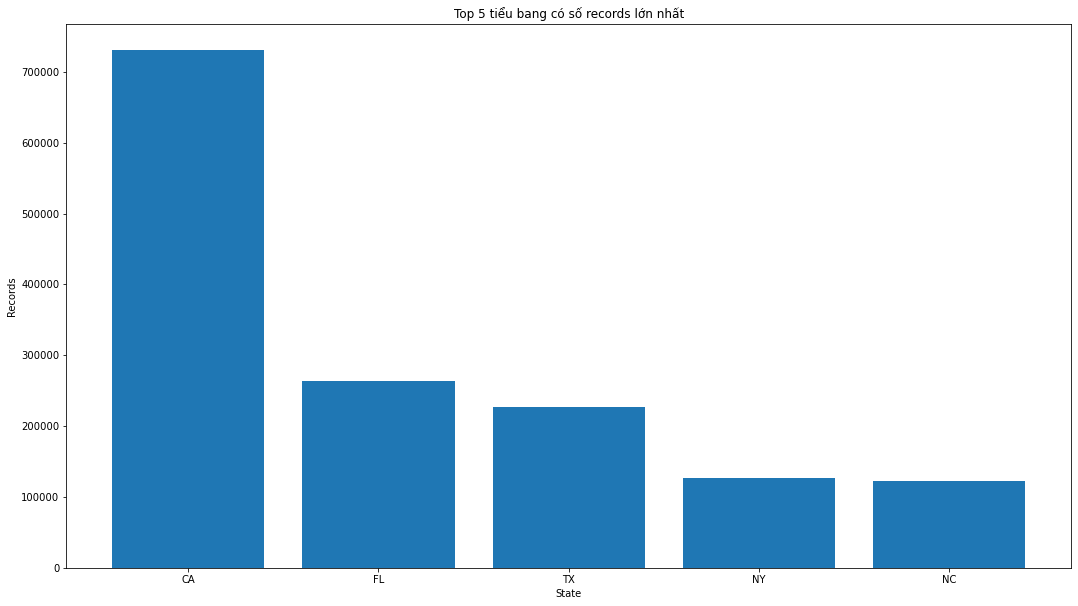

In [7]:
df = data['State'].value_counts().head(5)
plt.figure(figsize=(18,10))
plt.bar(df.index, df)
plt.xlabel('State')
plt.ylabel('Records')
plt.title('Top 5 tiểu bang có số records lớn nhất')

##### * Nhận xét: Tiểu bang California là tiểu bang có số vụ tai nạn cao nhất cao hơn rất nhiều so với top 2 - 5 phía dưới, cao gấp hơn 2 lần. Nguyên nhân đầu tiên chính là tiểu bang này là tiểu bang có dân số nhiều nhất nước Mỹ. Các nguyên nhân tiếp theo sẽ được phân tích sau:

Text(0.5, 1.0, 'Top 10 City có số Records lớn nhất tiểu bang California')

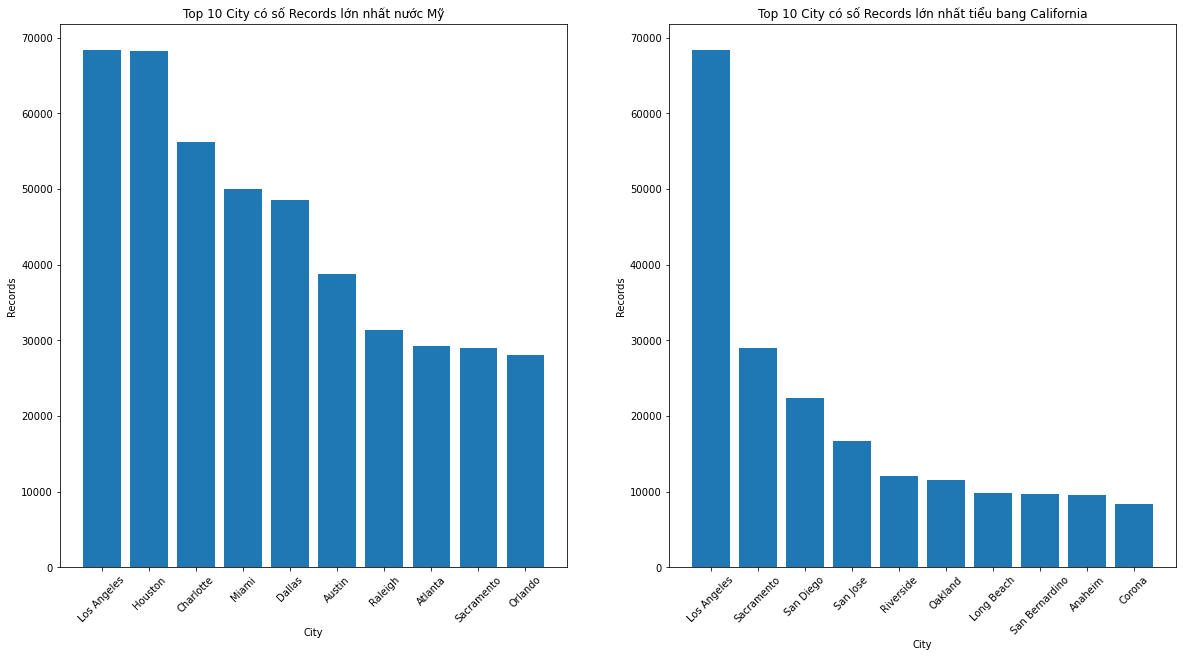

In [8]:
f, ax = plt.subplots(1,2, figsize = (20,10))

df1 = data['City'].value_counts().head(10)
ax[0].bar(df1.index, df1)
ax[0].xaxis.set_tick_params(rotation=45)
ax[0].set_xlabel('City')
ax[0].set_ylabel('Records')
ax[0].set_title('Top 10 City có số Records lớn nhất nước Mỹ')

df2 = data[data['State'] == 'CA']['City'].value_counts().head(10)
ax[1].bar(df2.index, df2)
ax[1].xaxis.set_tick_params(rotation=45)
ax[1].set_xlabel('City')
ax[1].set_ylabel('Records')
ax[1].set_title('Top 10 City có số Records lớn nhất tiểu bang California')

##### * Nhận xét: thành phố có số Records cao nhất nước nằm ở tiểu bang California. Chính điều này làm cho số Records ở bang này rất cao.

### Diễn biến số vụ tai nạn qua từng năm.

In [9]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['year'] = data['Start_Time'].dt.strftime("%Y")
data['month'] = data['Start_Time'].dt.strftime("%m")
data['day'] = data['Start_Time'].dt.strftime("%d")
data['week'] = data['Start_Time'].dt.strftime("%a")
data['hour'] = data['Start_Time'].dt.strftime("%H")
data['Week'] = data['Start_Time'].dt.strftime("%W")

In [10]:
#data.head()

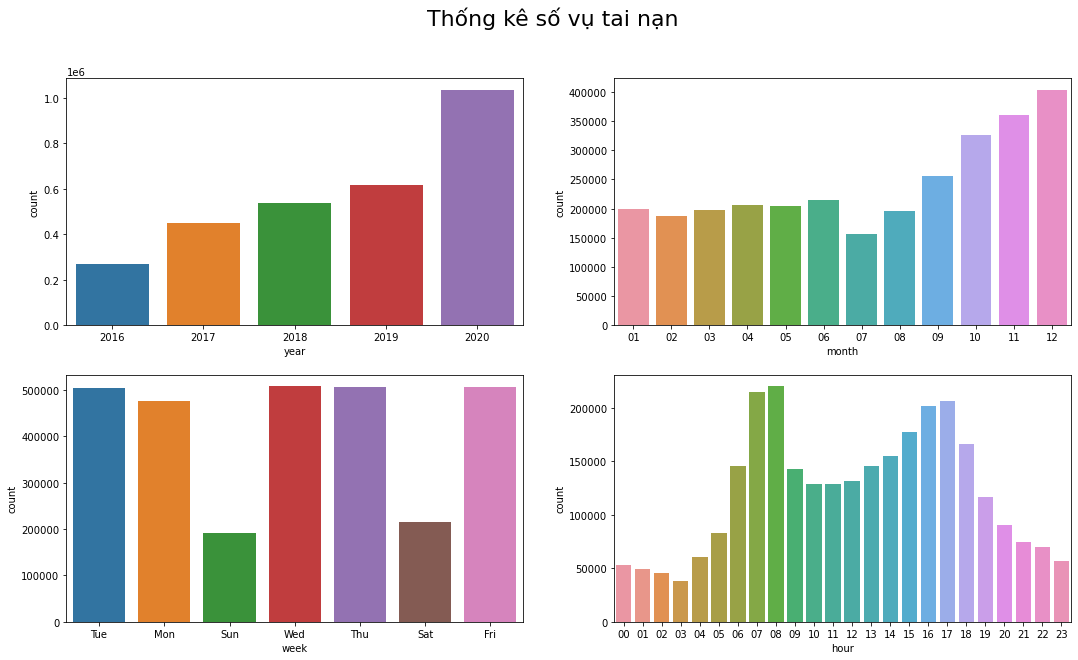

In [11]:
f, ax = plt.subplots(2,2, figsize = (18,10))
f.suptitle('Thống kê số vụ tai nạn', fontsize = 22)
sns.countplot(data = data, x = 'year', ax = ax[0][0])
sns.countplot(data = data, x = 'month', ax = ax[0][1])
sns.countplot(data = data, x = 'week', ax = ax[1][0])
sns.countplot(data = data, x = 'hour', ax = ax[1][1])

* Nhận xét: 
    + Tình hình tai nạn xảy ra tăng dần theo năm, đặc biệt là năm 2020 - tăng rất nhanh so với năm 2019(gần gấp đôi).
    + Tai nạn tăng nhanh những tháng cuối năm.
    + Tai nạn thường xảy ra vào các giờ cao điểm như 7-8, 15-17.
    + Tai nạn giảm vào cuối tuần.

### Khoảng thời gian thường xuyên xảy ra tai nạn trong ngày.

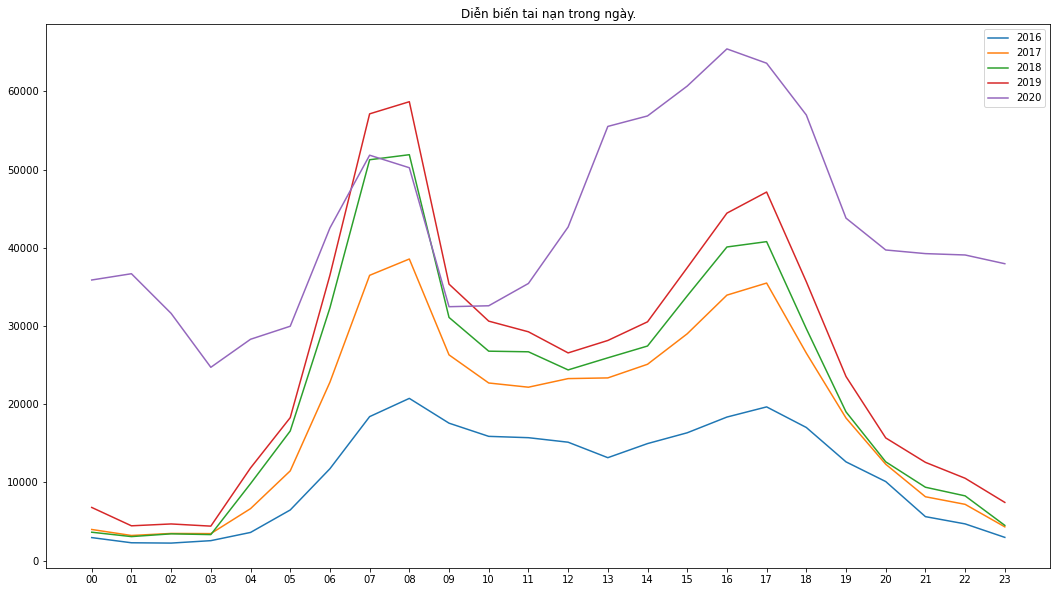

In [12]:
hour_df = data.groupby(['year'])['hour'].value_counts(sort = False)
index = hour_df['2016'].index
plt.figure(figsize = (18,10))
for i in range(5):
    plt.plot(index, hour_df['%s'%(str(2016+i))], label = '%s'%(str(2016+i)))
plt.title('Diễn biến tai nạn trong ngày.')
plt.legend()

- Số vụ tai nạn tăng rất nhiều qua từng năm
- Năm 2020, số vụ tai nạn xảy ra vào các giờ cao điểm 6-9 đã giảm so với năm 2019, tuy nhiên những khoảng thời gian còn lại đề tăng rất nhiều.

## Phân tích time series 

### Lấy dữ liệu là ngày xảy ra tai nạn (thuộc tính `Start_Time`) để dự đoán tình hình tai nạn của những năm tiếp theo.

In [13]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
day_time = pd.to_datetime(data['Start_Time'].dt.strftime("%Y-%m-%d"))

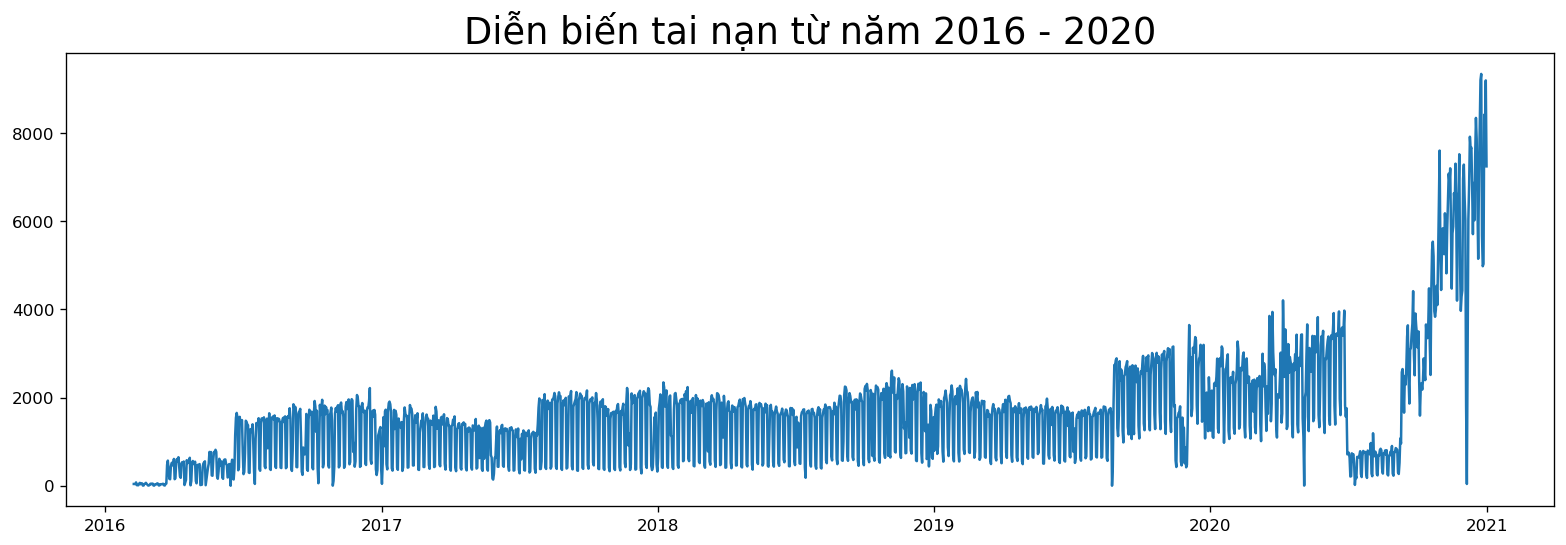

In [36]:
y_16_20 = day_time.value_counts().sort_index()
plt.figure(figsize=(16,5), dpi = 120)
plt.plot(y_16_20.index, y_16_20)
plt.title("Diễn biến tai nạn từ năm 2016 - 2020", size =22)
plt.show()

Text(0.5, 0.98, '2016-2020')

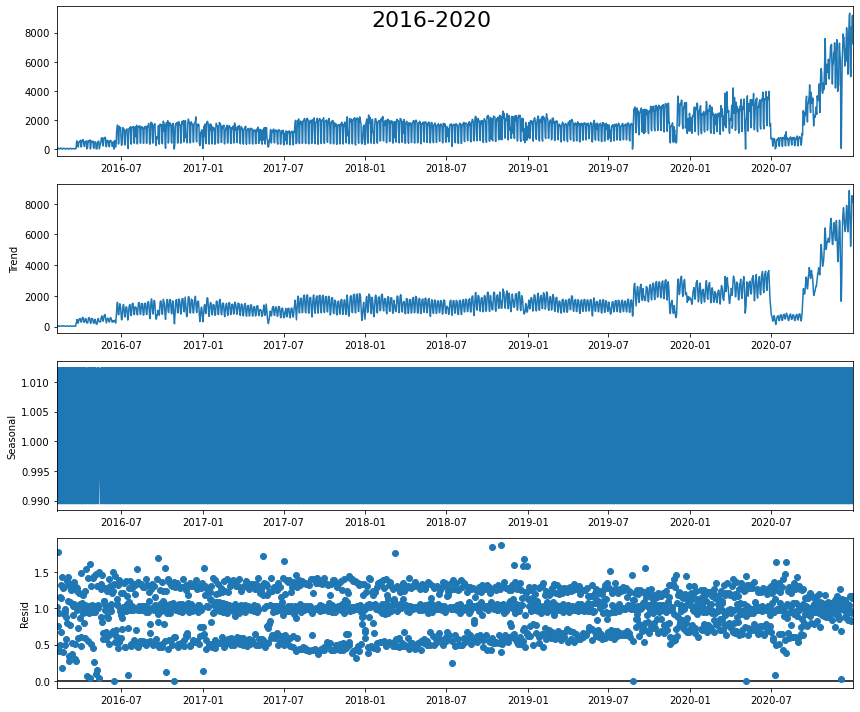

In [15]:
result = seasonal_decompose(pd.DataFrame(y_16_20), model='multiplicative',period = 3)
plt.rcParams.update({'figure.figsize': (12,10)})
result.plot().suptitle('2016-2020', fontsize=22)

##### Nhận thấy `trend` và `seasonal` của thời gian từ năm 2016 đến năm 2020 không được thể hiện rõ ràng. Khó để dự đoán tình hình tai nạn của các năm tiếp theo.
<b><i> ==> Dự đoán theo từng năm</i> </b> 

In [16]:
# tìm ra model tốt nhất với tập train đầu vào và chu kì của mùa vụ là m
'''Tham khảo: https://phamdinhkhanh.github.io/2019/12/12/ARIMAmodel.html
              https://otexts.com/fpp2/seasonal-arima.html
              
 + auto_arima sẽ chị ra các giá trị p,q để có được mô hình tốt nhất với tiêu chí là AIC
    (Mô hình có AIC nhỏ hơn nói chung sẽ tốt hơn)
 + Sau khi đã tìm ra được mô hình ARIMA tốt nhất. Chúng ta sẽ dự báo cho khoảng thời gian tiếp theo.
    Dự báo cho chuỗi thời gian khá đặc thù và khác biệt so với các lớp mô hình dự báo khác vì giá trị time step 
    liền trước sẽ được sử dụng để dự báo cho time step liền sau.
'''
def best_model(train,m):
    model_sarima = auto_arima(train, start_p=0, start_q=0,
                           max_p=7, max_q=7, m=m,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    return model_sarima
# Độ lỗi
def _measure_metric(y, y_pred):
    e = y-y_pred
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.mean(np.abs(e/y))*100

    print('Mean Square Error: {}'.format(mse))
    print('Root Mean Square Error: {}'.format(rmse))
    print('Mean Absolute Error: {}'.format(mae))
    print('Mean Absolute Percentage Error: {}'.format(mape))
    return mse, rmse, mae, mape

def draw(f, fitted):
    plt.figure(figsize=(20,6))
    plt.plot(f, label='Actual')
    plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
    plt.legend()
    plt.show()

### Phân tích các yếu tố xu hướng (trend), mùa vụ (seasonal), phần dư (residual) qua các năm

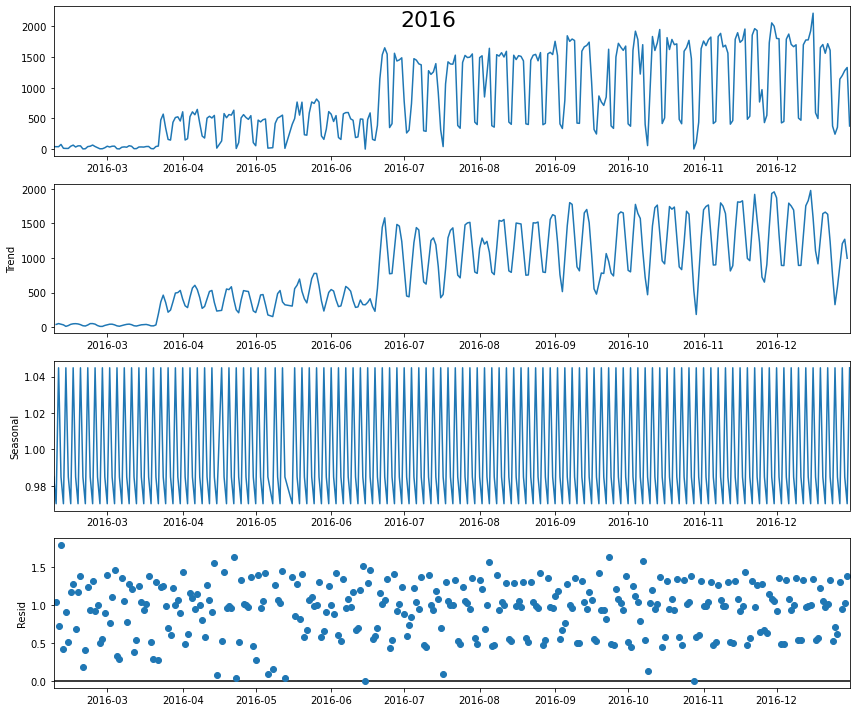

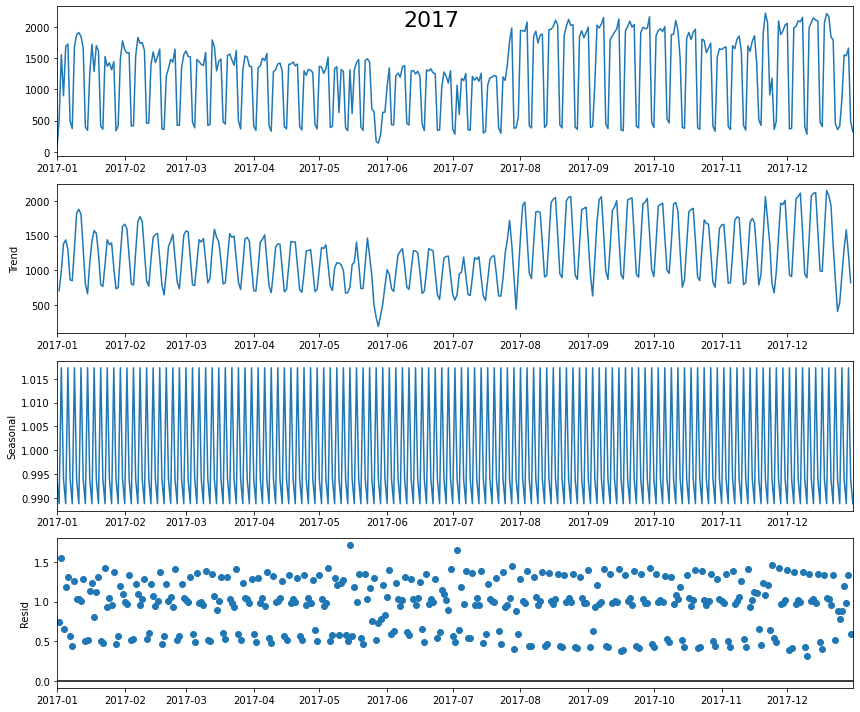

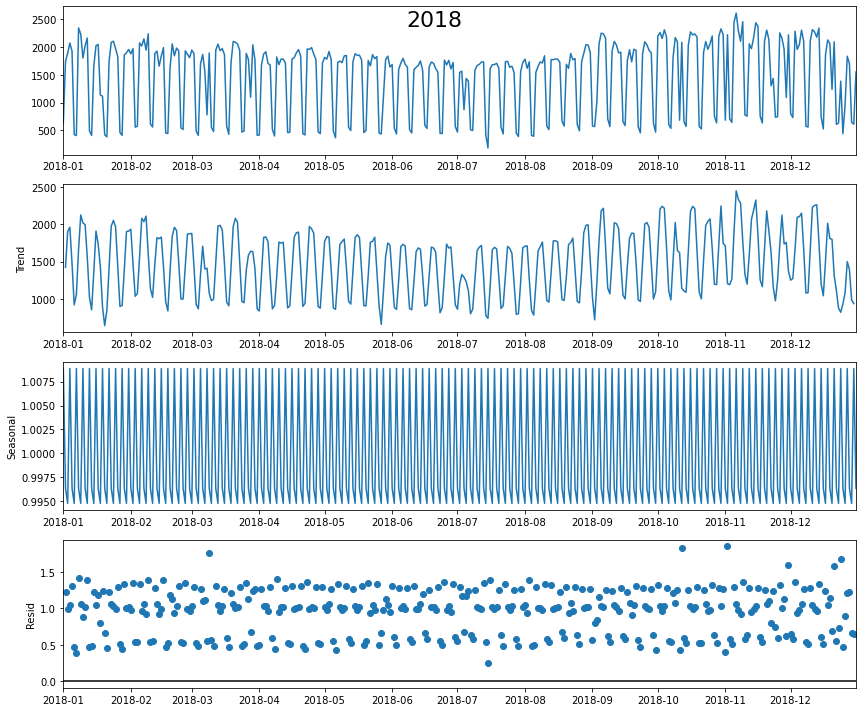

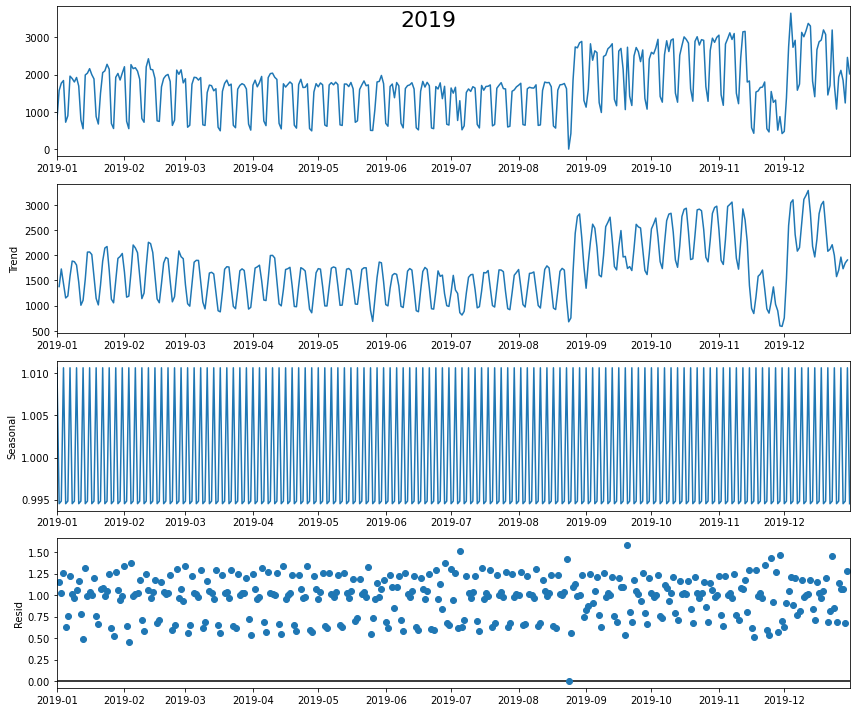

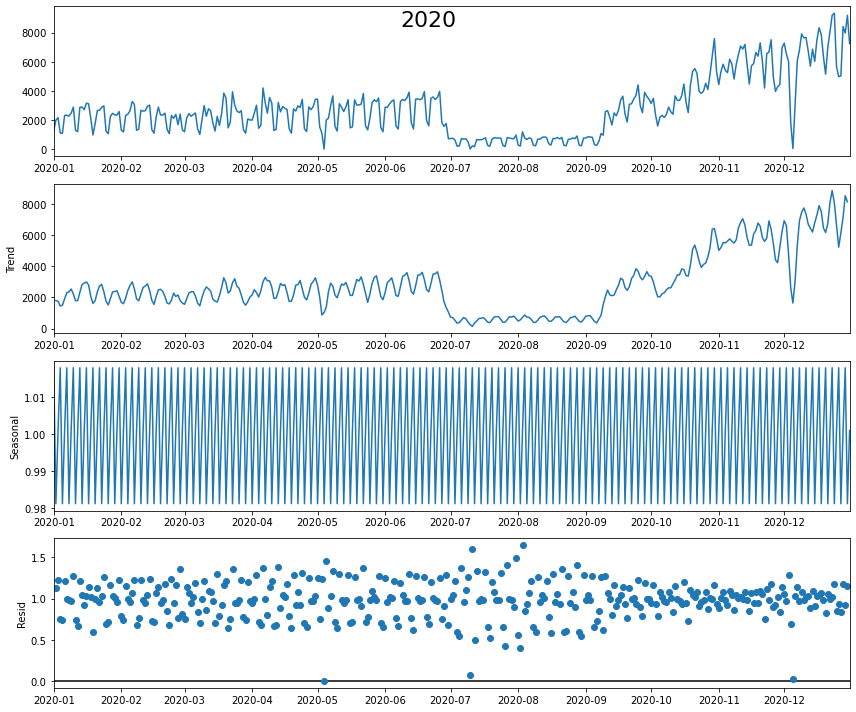

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i in range(5):
    f = day_time[(day_time >= datetime.datetime(2016+i,1,1)) & (day_time <= datetime.datetime(2016+i,12,31))].value_counts().sort_index()
    result = seasonal_decompose(pd.DataFrame(f), model='multiplicative',period = 3)
    plt.rcParams.update({'figure.figsize': (12,10)})
    result.plot().suptitle('%s'%(str(2016+i)), fontsize=22)
plt.show()

* Các năm đề có xu hướng và mùa vụ của tai nạn: ==> có thể dự đoán tương lai.

### Dự đoán:

#### Theo năm: Dùng dữ liệu trong 1 năm với tập train là từ đầu năm đến tháng 11 và tập test là tháng 12

##### Năm 2016

In [18]:
# Năm 2016
f = day_time[(day_time >= datetime.datetime(2016,1,1)) & (day_time <= datetime.datetime(2016,12,31))].value_counts().sort_index()
n_pred_perious = 30
train = f[:-n_pred_perious]
test = f[-n_pred_perious:]

- Vẽ các biểu đồ acf và pacf để tìm giá trị mùa vụ:

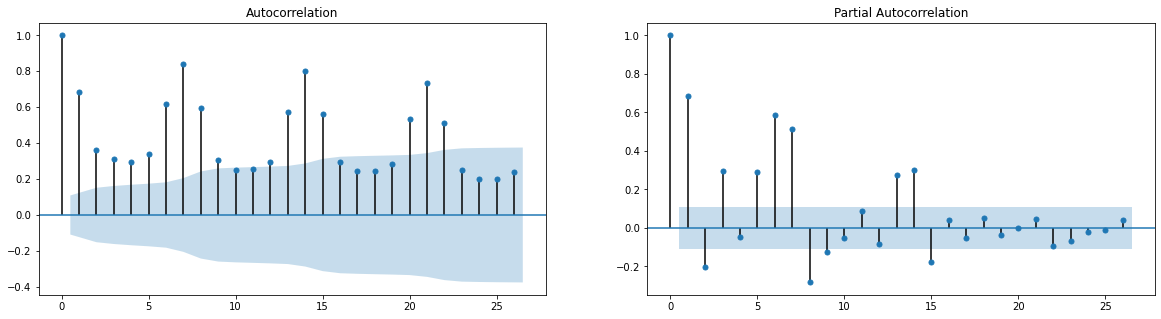

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
plot_acf(f, ax = axes[0])
plot_pacf(f, ax = axes[1])
plt.show()

- Chọn m = 8

In [20]:
model_sarima = best_model(train,m = 8)
fitted, confint = model_sarima.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='D')
fitted_seri = pd.Series(fitted, index=date)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=4530.550, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=4515.163, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[8]             : AIC=4525.795, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[8]             : AIC=4442.975, Time=0.47 sec
 ARIMA(1,1,0)(2,1,1)[8]             : AIC=inf, Time=1.49 sec
 ARIMA(1,1,0)(1,1,1)[8]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(2,1,0)[8]             : AIC=4441.004, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[8]             : AIC=4515.306, Time=0.06 sec
 ARIMA(0,1,0)(2,1,1)[8]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(1,1,1)[8]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,1)(2,1,0)[8]             : AIC=4442.908, Time=0.42 sec
 ARIMA(1,1,1)(2,1,0)[8]             : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(2,1,0)[8] intercept   : AIC=4443.004, Time=0.76 sec

B

In [21]:
# độ lỗi
_measure_metric(test, fitted_seri)

Mean Square Error: 417821.3676996385
Root Mean Square Error: 646.3910331213131
Mean Absolute Error: 552.7633116280721
Mean Absolute Percentage Error: 74.44399178675573


(417821.3676996385, 646.3910331213131, 552.7633116280721, 74.44399178675573)

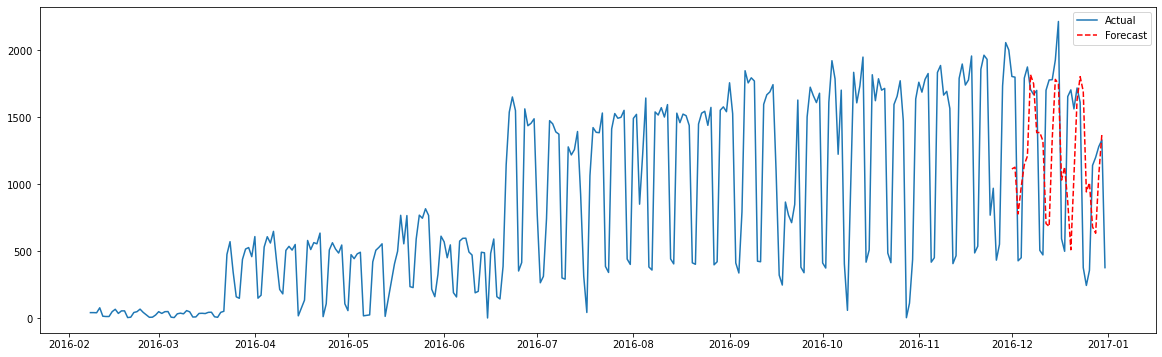

In [22]:
draw(f, fitted_seri)

#### Năm 2017

In [23]:
f = day_time[(day_time >= datetime.datetime(2017,1,1)) & (day_time <= datetime.datetime(2017,12,31))].value_counts().sort_index()
n_pred_perious = 30
train = f[:-n_pred_perious]
test = f[-n_pred_perious:]

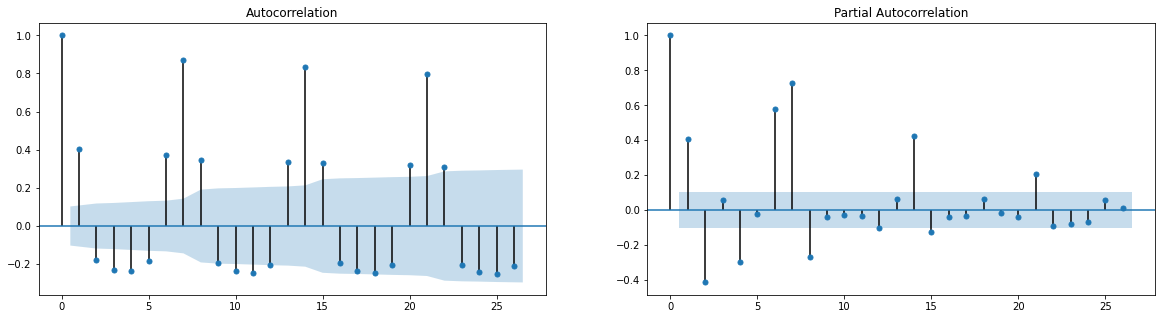

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
plot_acf(f, ax = axes[0])
plot_pacf(f, ax = axes[1])
plt.show()

- Chọn: m = 8

In [25]:
model_sarima = best_model(train,m = 8)
fitted, confint = model_sarima.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='D')
fitted_seri = pd.Series(fitted, index=date)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=5377.054, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=5352.152, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[8]             : AIC=5362.531, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[8]             : AIC=5233.032, Time=1.08 sec
 ARIMA(1,1,0)(2,1,1)[8]             : AIC=inf, Time=1.78 sec
 ARIMA(1,1,0)(1,1,1)[8]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(2,1,0)[8]             : AIC=5233.056, Time=0.20 sec
 ARIMA(2,1,0)(2,1,0)[8]             : AIC=5224.285, Time=0.53 sec
 ARIMA(2,1,0)(1,1,0)[8]             : AIC=5232.957, Time=0.15 sec
 ARIMA(2,1,0)(2,1,1)[8]             : AIC=inf, Time=4.45 sec
 ARIMA(2,1,0)(1,1,1)[8]             : AIC=inf, Time=0.97 sec
 ARIMA(3,1,0)(2,1,0)[8]             : AIC=5177.930, Time=2.56 sec
 ARIMA(3,1,0)(1,1,0)[8]             : AIC=5234.134, Time=0.20 s

In [26]:
_measure_metric(test,fitted_seri)

Mean Square Error: 707051.3296930284
Root Mean Square Error: 840.8634429519625
Mean Absolute Error: 671.7560752865753
Mean Absolute Percentage Error: 108.61592310735307


(707051.3296930284, 840.8634429519625, 671.7560752865753, 108.61592310735307)

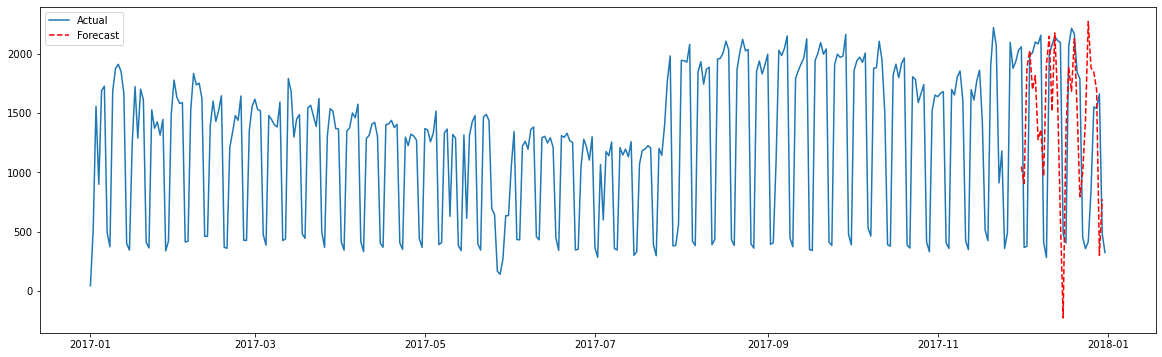

In [27]:
draw(f, fitted_seri)

##### Dùng dữ liệu năm 2019 và 2020 để dự đoán 2 tháng đầu năm 2021.

In [28]:
train = day_time[(day_time >= datetime.datetime(2019,1,1)) & (day_time <= datetime.datetime(2020,12,31))].value_counts().sort_index()

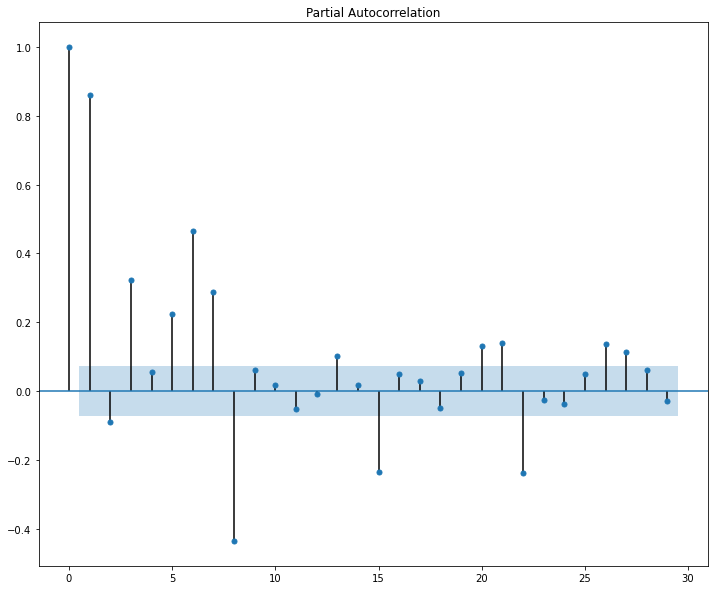

In [29]:
plot_pacf(train)
plt.show()

##### Nhìn vào biểu đồ PACF có thể lựa chọn giá trị mùa vụ là 8( vì các giá trị PACF tăng đột biến ở các độ trễ 8, 15 , 22)

In [30]:
# Dự đoán:
train = day_time[(day_time >= datetime.datetime(2019,1,1)) & (day_time <= datetime.datetime(2020,12,31))].value_counts().sort_index()
n_pred_perious = 60

model_sarima = best_model(train,m = 8)
fitted, confint = model_sarima.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='D')
fitted_seri = pd.Series(fitted, index=date)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=12226.654, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=12154.541, Time=0.99 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=inf, Time=1.30 sec
 ARIMA(1,1,0)(0,1,0)[8]             : AIC=12203.691, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[8]             : AIC=11971.385, Time=2.79 sec
 ARIMA(1,1,0)(2,1,1)[8]             : AIC=inf, Time=4.40 sec
 ARIMA(1,1,0)(1,1,1)[8]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(2,1,0)[8]             : AIC=11969.631, Time=0.39 sec
 ARIMA(0,1,0)(1,1,0)[8]             : AIC=12160.054, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[8]             : AIC=inf, Time=2.64 sec
 ARIMA(0,1,0)(1,1,1)[8]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,1)(2,1,0)[8]             : AIC=11971.132, Time=2.17 sec
 ARIMA(1,1,1)(2,1,0)[8]             : AIC=inf, Time=4.68 sec
 ARIMA(0,1,0)(2,1,0)[8] intercept   : AIC=11971.565, Time=1.8

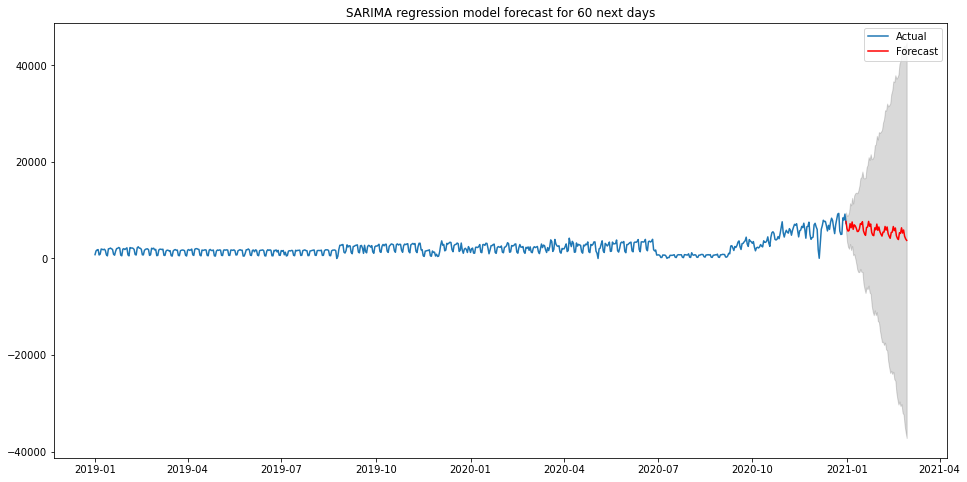

In [31]:
# Mô hình dự đoán:
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(16, 8))
plt.plot(train, label='Actual')
plt.plot(fitted_seri, color='red', label = 'Forecast')
plt.fill_between(date, lower, upper, color='k', alpha=0.15)
plt.legend()
plt.title('SARIMA regression model forecast for 60 next days')
plt.show()

### Dự đoán cho năm 2021:

In [32]:
train = day_time.value_counts().sort_index()

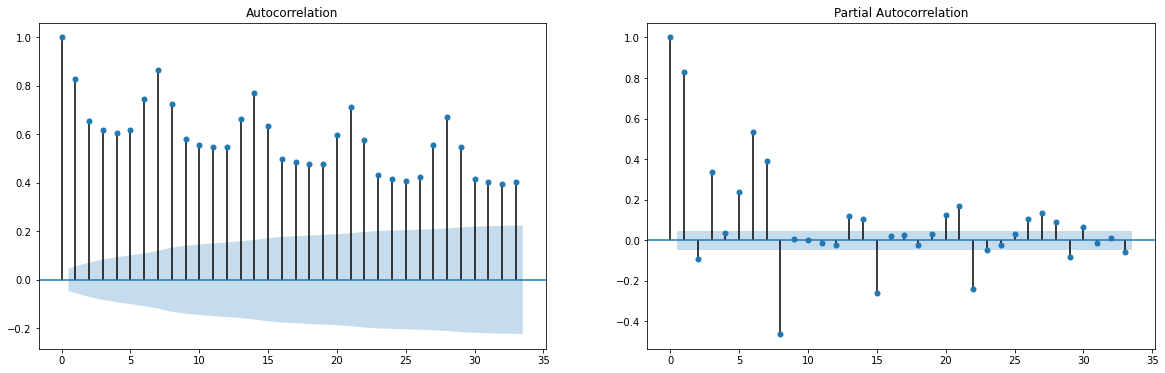

In [33]:
f, axes = plt.subplots(1,2,figsize = (20,6))
plot_acf(train, ax = axes[0])
plot_pacf(train, ax = axes[1])
plt.show()

- chọn m= 8

In [34]:
n_pred_perious = 365
model_sarima = best_model(train,m = 8)
fitted, confint = model_sarima.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='D')
fitted_seri = pd.Series(fitted, index=date)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=29672.309, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=29491.968, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=inf, Time=2.25 sec
 ARIMA(1,1,0)(0,1,0)[8]             : AIC=29591.244, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[8]             : AIC=28987.283, Time=6.09 sec
 ARIMA(1,1,0)(2,1,1)[8]             : AIC=inf, Time=10.71 sec
 ARIMA(1,1,0)(1,1,1)[8]             : AIC=inf, Time=3.40 sec
 ARIMA(0,1,0)(2,1,0)[8]             : AIC=28989.216, Time=0.87 sec
 ARIMA(2,1,0)(2,1,0)[8]             : AIC=28884.736, Time=5.34 sec
 ARIMA(2,1,0)(1,1,0)[8]             : AIC=28970.588, Time=1.70 sec
 ARIMA(2,1,0)(2,1,1)[8]             : AIC=inf, Time=16.66 sec
 ARIMA(2,1,0)(1,1,1)[8]             : AIC=inf, Time=5.12 sec
 ARIMA(3,1,0)(2,1,0)[8]             : AIC=28722.222, Time=11.18 sec
 ARIMA(3,1,0)(1,1,0)[8]             : AIC=28973.668,

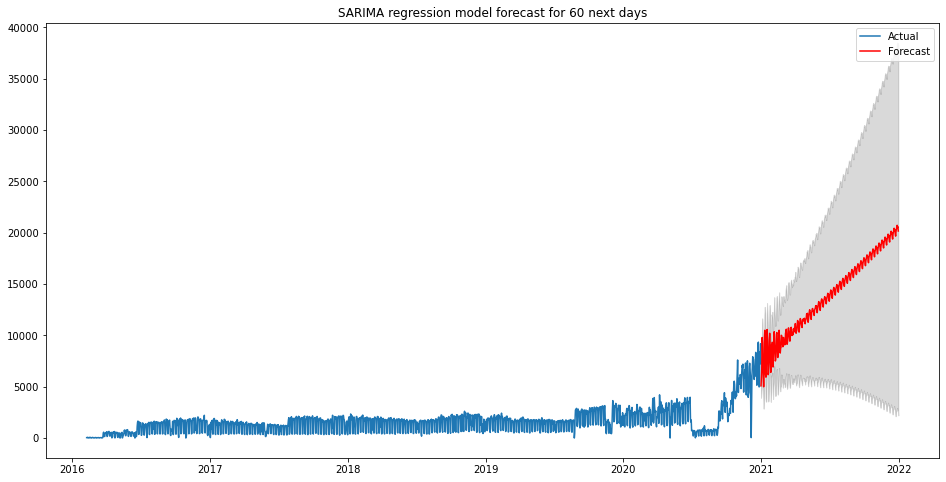

In [35]:
# Mô hình dự đoán:
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(16, 8))
plt.plot(train, label='Actual')
plt.plot(fitted_seri, color='red', label = 'Forecast')
plt.fill_between(date, lower, upper, color='k', alpha=0.15)
plt.legend()
plt.title('SARIMA regression model forecast for 60 next days')
plt.show()